# Checkpoint - Logistic Regression - KHERFI Khadir Assil-2020

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

titanic=pd.read_csv("titanic-passengers_2020.csv",sep=";")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [84]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
titanic['Age'] = titanic['Age'].fillna((titanic['Age'].median()))
titanic["Cabin"].fillna('G6', inplace=True)
titanic["Embarked"] = titanic["Embarked"].fillna('C')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Preparing our data for logistic regression 

In [86]:
titanic = titanic.drop(columns = 'Name')
titanic = titanic.drop(columns = 'Ticket')
titanic = titanic.drop(columns = 'PassengerId')


titanic['Survived'].replace(['No','Yes'], [0,1], inplace=True)
titanic['Sex'].replace(['male','female'], [0,1], inplace=True)
titanic['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic['Cabin']=encoder.fit_transform(titanic['Cabin'])

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,0,28.0,0,0,13.0000,145,0
1,0,3,0,25.0,0,0,7.6500,140,0
2,0,3,0,20.0,0,0,7.8542,145,0
3,0,3,1,29.0,0,4,21.0750,145,0
4,0,1,0,31.0,1,0,52.0000,38,0


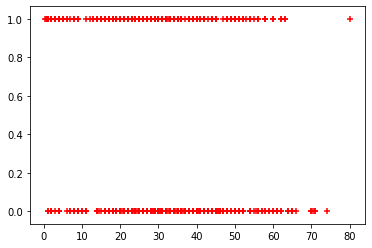

In [117]:
import seaborn as sns
plt.scatter(titanic.Age, titanic.Survived, marker='+', color='red')

In [87]:
# import relevant libairies

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [88]:
# features extraction

x = titanic.iloc[:, 1:9]
y = titanic.iloc[:, 0]

x_train, x_test, y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=0) 

In [89]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Model Development and Prediction

In [105]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)    

pred_proba = logreg.predict_proba(x_train) 

print('.............................................................')

print('Coef = :', logreg.coef_)
print('.............................................................')

print('Intercept = :', logreg.intercept_)

print('.............................................................')


.............................................................
Coef = : [[-0.99300624  1.24107969 -0.46033588 -0.32040733 -0.0307725   0.02219929
  -0.028372    0.25370611]]
.............................................................
Intercept = : [-0.59894243]
.............................................................


In [107]:
print('.............................................................')


print('The Training Accuracy is :', logreg.score(x_train, y_train))

print('.............................................................')

print('The Testing Accuracy is :', logreg.score(x_test, y_test))

print('.............................................................')


print(classification_report(y_train, y_pred_train))

print('.............................................................')


.............................................................
The Training Accuracy is : 0.7893258426966292
.............................................................
The Testing Accuracy is : 0.8100558659217877
.............................................................
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       431
           1       0.74      0.72      0.73       281

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712

.............................................................


# Model Evaluation using Confusion Matrix  & Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, we will visualize the confusion matrix using Heatmap.

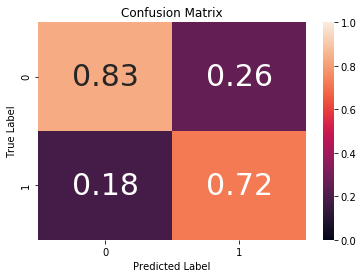

In [108]:
def plot_confusion_matrix(cm, classes = None, title = 'Confusion Matrix'):
    """Plots a Confusion Matrix. """
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels = classes, vmin = 0, vmax = 1, annot = True, annot_kws = {'size' : 30})
        
    else : 
        sns.heatmap(cm, vmin = 0, vmax = 1)
    
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

cm = confusion_matrix(y_train, y_pred_train)

cm_norm = cm / cm.sum(axis = 1)

plot_confusion_matrix(cm_norm, classes = logreg.classes_, title = 'Confusion Matrix')

Here, we can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. we have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 0.83 and 0.72 are actual predictions, and 0.18 and 0.26 are incorrect predictions.

# Confusion Matrix Informations Demonstration 

In [110]:
FP = cm.sum(axis = 0) - np.diag(cm)
FN = cm.sum(axis = 1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP+FN+TP)

# True Positive Rate :
TPR = TP / (TP + FN)
print('--------------------------------------------------------------')
print("The True Positive Rate is :", TPR)
print('--------------------------------------------------------------')

#Precision or positive predictive value :
PPV = TP / (TP + FP)
print("The Precision is :", PPV)
print('--------------------------------------------------------------')

# Fale Positive Rate :
FPR = FP / (FP + TN)
print("The False Positive Rate is :", FPR)
print('--------------------------------------------------------------')

# Fale Negative Rate :
FNR = FN / (FN + TP)
print("The False Negative Rate is :", FNR)
print('..............................................................')
print('..............................................................')

# Accuracy:
Accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy is:', Accuracy)
print('..............................................................')

# Recall :
Recall = TP/(TP+FN)
print('Recall is:', Recall)
print('..............................................................')

# Precision :
Precision= TP/(TP+FP)
print('Precision is:', Precision)
print('--------------------------------------------------------------')


--------------------------------------------------------------
The True Positive Rate is : [0.83294664 0.72241993]
--------------------------------------------------------------
The Precision is : [0.8215103  0.73818182]
--------------------------------------------------------------
The False Positive Rate is : [0.27758007 0.16705336]
--------------------------------------------------------------
The False Negative Rate is : [0.16705336 0.27758007]
..............................................................
..............................................................
Accuracy is: [0.78932584 0.78932584]
..............................................................
Recall is: [0.83294664 0.72241993]
..............................................................
Precision is: [0.8215103  0.73818182]
--------------------------------------------------------------


# ROC Curve

In [111]:
from sklearn.metrics import roc_auc_score

logit_roc_auc = roc_auc_score(y_test, y_pred_test)
logit_roc_auc

0.7846624062239511

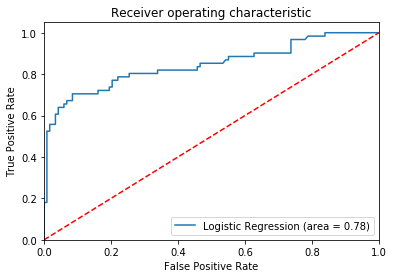

In [126]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).